In [1]:
import numpy as np
from numpy import random
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt #importing required libraries

In [2]:
data = pd.read_csv('clustering_data.csv')
index=np.arange(0,157126,1) #creating array for indices

index_pd=pd.Series(index)  #convert to series

data['index']=index_pd   #add to the dataframe
data

C:\Users\Fawwaz\AppData\Local\Temp\ipykernel_30340\3798566091.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('clustering_data.csv')


,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude,index
0,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Peddakotla B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5689,77.85624,0
1,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Pinnadhari B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5281,77.857014,1
2,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Yerraguntapalle B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.561111,77.85715,2
3,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Obulareddipalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.2488,78.2588,3
4,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Odulapalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.24555,78.2477,4
...,...,...,...,...,...,...,...,...,...,...,...,...
157121,Uttar Pradesh Circle,Bareilly Region,Meerut Division,Rly Road Meerut SO,250002,PO,Non Delivery,MEERUT,UTTAR PRADESH,28.98,77.68,157121
157122,Uttar Pradesh Circle,Bareilly Region,Meerut Division,SGMandi SO,250002,PO,Non Delivery,MEERUT,UTTAR PRADESH,28.9724,77.67536,157122
157123,Uttar Pradesh Circle,Bareilly Region,Meerut Division,W K Road SO,250001,PO,Non Delivery,MEERUT,UTTAR PRADESH,28.99,77.71,157123
157124,Kerala Circle,Calicut Region,Calicut Division,Kakkoti SO,673611,PO,Delivery,KOZHIKODE,KERALA,11.24529,75.778455,157124


In [3]:
ts_data=data[data['CircleName'] == "Telangana Circle"]  #extract dataframe of Telangana
ts_data

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude,index
138,Telangana Circle,Hyderabad Region,Nizamabad Division,Arsapalli B.O,503186,BO,Delivery,NIZAMABAD,TELANGANA,18.6845544,78.0773742,138
139,Telangana Circle,Hyderabad Region,Nizamabad Division,Camp Ootpalli B.O,503180,BO,Delivery,NIZAMABAD,TELANGANA,18.5329923,77.618717,139
140,Telangana Circle,Hyderabad Region,Nizamabad Division,Eraspalli B.O,503180,BO,Delivery,NIZAMABAD,TELANGANA,18.5329923,77.618717,140
141,Telangana Circle,Hyderabad Region,Nizamabad Division,Singitham B.O,503187,BO,Delivery,KAMAREDDY,TELANGANA,18.3096558,77.9466324,141
142,Telangana Circle,Hyderabad Region,Nizamabad Division,Mahmadpur B.O,503101,BO,Delivery,KAMAREDDY,TELANGANA,18.2108201,78.4853495,142
...,...,...,...,...,...,...,...,...,...,...,...,...
150614,Telangana Circle,Hyderabad Region,Nalgonda Division,Valigonda S.O,508112,PO,Delivery,YADADRI BHUVANAGIRI,TELANGANA,17.377222,79.0245556,150614
151046,Telangana Circle,Hyderabad City Region,Medak Division,Makkarajpet S.O,502247,PO,Delivery,MEDAK,TELANGANA,17.949361,78.5200556,151046
151047,Telangana Circle,Hyderabad City Region,Medak Division,Rajpally S.O,502117,PO,Delivery,MEDAK,TELANGANA,18.019889,78.2949444,151047
151048,Telangana Circle,Hyderabad City Region,Medak Division,Toopran S.O,502334,PO,Delivery,MEDAK,TELANGANA,17.905167,78.4610833,151048


In [4]:
lat=ts_data[['Latitude']]
lat
long=ts_data[['Longitude']]
long
index=ts_data[['index']]
index

,index
138,138
139,139
140,140
141,141
142,142
...,...
150614,150614
151046,151046
151047,151047
151048,151048


In [5]:
#convert dataframe to array
lat_numpy=lat.values
long_numpy=long.values
index_numpy=index.values 

#convert 2D array to 1D array
index_array=index_numpy.flatten()
lat_array=lat_numpy.flatten()
long_array=long_numpy.flatten()

#convert datatype to float

lat_array=lat_array.astype(float)
long_array=long_array.astype(float)
index_array=index_array.astype(float)

nan_num=np.sum(np.isnan(lat_array))  #number of nan values
nan_num
print(np.isnan(lat_array[0]))

False


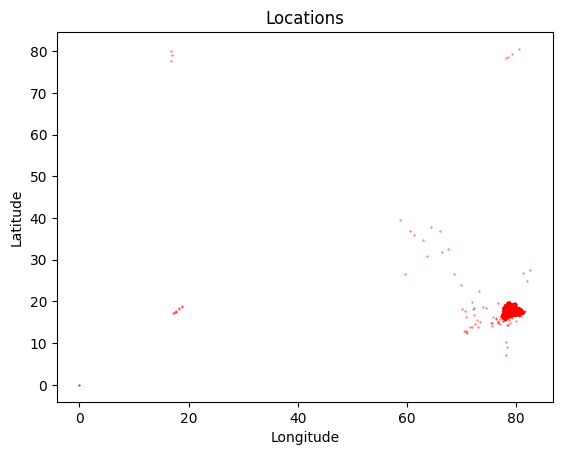

In [6]:
#locations before removing nan values
plt.title('Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(long_array,lat_array,marker='o',c='red',s=0.1,)

In [7]:
#removing nan values
index_not_nan=np.zeros(4280)
m=long_array.size
j=0
f=0  #count of nan values
for i in range(m):
    if(np.isnan(long_array[i]) and np.isnan(lat_array[i])):
        f=f+1
    else:
        index_not_nan[j]=i
        j=j+1

print(j,f)

index_not_nan=index_not_nan.astype(int)


#index longitude and latitude arrays with no nan value
index_arr_not=index_array[index_not_nan]
lat_arr_not=lat_array[index_not_nan]
long_arr_not=long_array[index_not_nan]

4280 1535


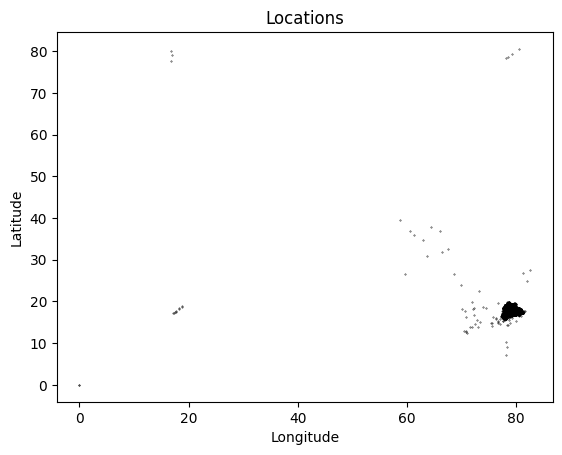

In [8]:
#after removing nan values only
plt.title('Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(long_arr_not,lat_arr_not,marker='o',c='black',s=0.1,)

In [9]:
#removing the values which easily are out of bound of Telangana
t=long_arr_not.size
index_sorted=np.zeros(0)
j=0

for i in range(t):
    if(long_arr_not[i]>77.0 and long_arr_not[i]<82.0 and lat_arr_not[i]>15.5 and lat_arr_not[i]<20.0):
        index_sorted=np.append(index_sorted,i)

index_sorted=index_sorted.astype(int)

index_arr=index_arr_not[index_sorted]
lat_arr=lat_arr_not[index_sorted]
long_arr=long_arr_not[index_sorted]
print(lat_arr.size, long_arr.size)
        

4206 4206


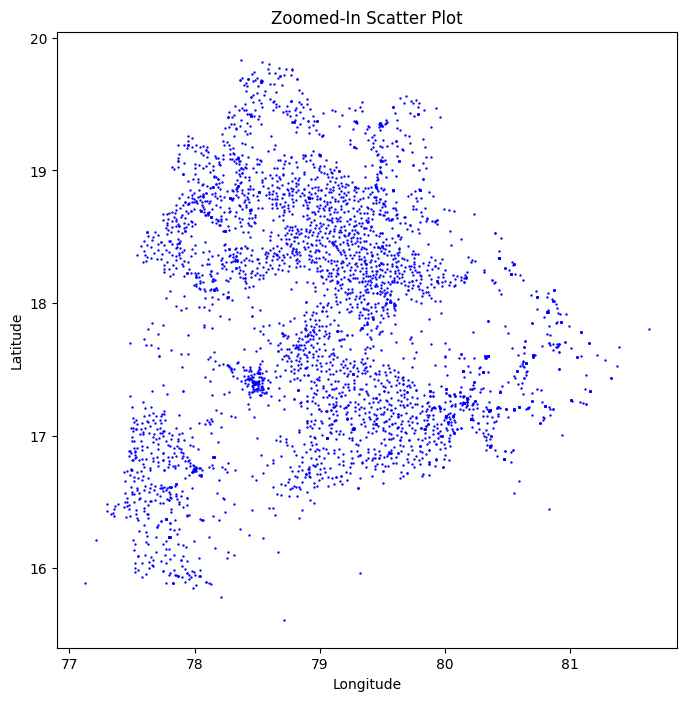

In [10]:
fig, ax = plt.subplots(figsize=(8,8))  
ax.scatter(long_arr, lat_arr, s=0.5,marker='o',c='blue')  

ax.set_title('Zoomed-In Scatter Plot')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

In [11]:
#starting with k-means clustering

#function to choose random indices for cluster centroids from the array
def initialize_indices(x,k):
    indices=np.random.choice(len(x),k,replace=False) #choosing unique indices
    return indices                   
'''k=33
indices=initialize_indices(index_arr,k) 
indices'''

'k=33\nindices=initialize_indices(index_arr,k) \nindices'

In [12]:
'''#choosing centroids of longitudes and latitudes from above indices

centroid_long=long_arr[indices]
centroid_lat=lat_arr[indices]
centroid_lat
centroid_long'''

'#choosing centroids of longitudes and latitudes from above indices\n\ncentroid_long=long_arr[indices]\ncentroid_lat=lat_arr[indices]\ncentroid_lat\ncentroid_long'

In [13]:
#function to cluster values to respective centroids

def assign_clusters(centroid_long,centroid_lat,long_arr,lat_arr):
    m=long_arr.size
    number=centroid_long.size
    clustered=np.zeros(m+1)
   
    for i in range(m):
        distances=np.zeros(number)
        for j in range(number): 
            dist=0 #calculate distance of point from each centroid
            dist=np.sqrt((centroid_long[j]-long_arr[i])**2 + (centroid_lat[j]-lat_arr[i])**2)
            distances[j]=dist  #storing the distances
        clustered[i]=np.argmin(distances) #assignes the nearest centroid
        
    return clustered


'''clustered = assign_clusters(centroid_long,centroid_lat,long_arr,lat_arr)  #array which contains mapped data
maxi=np.max(clustered)
print(maxi)'''

'clustered = assign_clusters(centroid_long,centroid_lat,long_arr,lat_arr)  #array which contains mapped data\nmaxi=np.max(clustered)\nprint(maxi)'

In [14]:
#calculating the mean array

def calc_mean(clustered,lat_arr,long_arr,centroid_long):
    m=long_arr.size
    t=centroid_long.size
    mean_arr_long=np.zeros(t)
    mean_arr_lat=np.zeros(t)
    for i in range(t):
        f=0
        mean_long=0
        mean_lat=0
        for j in range (m):
            if(clustered[j]==i):
                mean_long=mean_long+long_arr[j]
                mean_lat=mean_lat+lat_arr[j]
                f=f+1
        mean_arr_long[i]=mean_long/f
        mean_arr_lat[i]=mean_lat/f
    return mean_arr_long,mean_arr_lat


'''mean_long,mean_lat=calc_mean(clustered,lat_arr,long_arr,centroid_long)
print(mean_long,mean_lat)
mean_long.size'''

'mean_long,mean_lat=calc_mean(clustered,lat_arr,long_arr,centroid_long)\nprint(mean_long,mean_lat)\nmean_long.size'

In [15]:
#reassigning the centroid

def new_centroid_indices(clustered,lat_arr,long_arr,mean_long,mean_lat):
    m=long_arr.size
    t=mean_long.size
    new_centroid_index=np.zeros(t)
    for i in range(t):  #loop for old centroids
        dist=np.zeros(m)
        for j in range(m):  #loop for all locations
            dist[j]=np.sqrt((mean_long[i]-long_arr[j])**2 + (mean_lat[i]-lat_arr[j])**2)   #distance between mean locations and all locations
        new_centroid_index[i]=np.argmin(dist)  #assigning the nearest location as the new centroid
    new_centroid_index=new_centroid_index.astype(int)
    return new_centroid_index

'''new_indices=new_centroid_indices(clustered,lat_arr,long_arr,mean_long,mean_lat)
new_indices'''

'new_indices=new_centroid_indices(clustered,lat_arr,long_arr,mean_long,mean_lat)\nnew_indices'

In [68]:
def kmeans(index_arr,lat_arr,long_arr,initialize_indices,assign_clusters,calc_mean,new_centroid_indices,iterations,k,a,b):
    #initialize indices of centroids
    indices=initialize_indices(index_arr,k)
    for s in range(iterations):
        a=a+1    #to check how many times the loop is running
        #get the centroid positions
        centroid_long=long_arr[indices]
        centroid_lat=lat_arr[indices]
        #map the data to respective centroids
        clustered = assign_clusters(centroid_long,centroid_lat,long_arr,lat_arr)
        #find the mean of the clusters
        mean_long,mean_lat=calc_mean(clustered,lat_arr,long_arr,centroid_long)
        #change the centroid positions
        new_indices=new_centroid_indices(clustered,lat_arr,long_arr,mean_long,mean_lat)
        #to check if there is no change after calculating the mean positions so that we can stop
        f1=0
        for j in range(len(indices)):
            if(indices[j]==new_indices[j]):
                f1=f1+1 
        if(f1==33):
            b=b+1  #to indicate that it has ended here
            break
            return new_indices,clustered,a,b
        #updating the indices
        indices=new_indices
    return new_indices,clustered,a,b
    #new_indices are the indices of the centroid locations
    #clustered contains the data to which centroid each location is mapped

In [69]:
a=0
b=0
indices,clustered,s,t=kmeans(index_arr,lat_arr,long_arr,initialize_indices,assign_clusters,calc_mean,new_centroid_indices,20,33,a,b)
print(indices,s,t)

[ 157 2593 1288 1458 2373 3362 1341 1163 3958 3943 1559 1597 3274 2123
 3494 2528 3509 1960 3357  601 3638  958 1626  401 2149  712  798 2492
  496 1230  513 1135 3769] 13 1


In [72]:
#defining the centroids
centroid_long=long_arr[indices]
centroid_lat=lat_arr[indices]

In [70]:
#to get number of places assigned to each centroid
number=np.zeros(33)
t=long_arr.size
for i in range(33):
    for j in range(t):
        if(clustered[j]==i):
            number[i]=number[i]+1
number
        

array([177.,  81., 107., 103., 145.,  82., 121., 173., 179., 150.,  90.,
       147., 151.,  93., 173.,  66.,  68., 219., 124.,  33., 175.,  65.,
        78., 167., 192., 175.,  79., 117., 163., 166., 181., 102.,  64.])

C:\Users\Fawwaz\AppData\Local\Temp\ipykernel_30340\421616583.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(long_arr[j],lat_arr[j],s=10,marker='o',c=color[i])


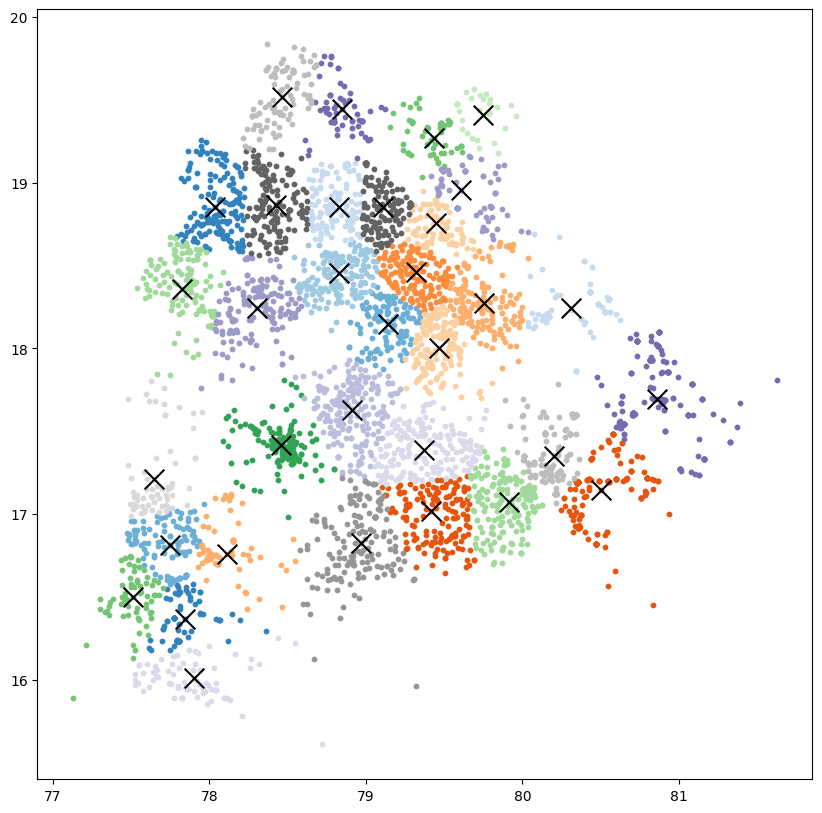

In [73]:
#to get 33 different colours for clusters
cmap = plt.get_cmap('tab20c')
colors=[cmap(i/33) for i in range(33)]
color=np.array(colors)

fig, ax = plt.subplots(figsize=(10,10))
t=long_arr.size
for i in range(33):   #loop running for 33 centroids
    for j in range(t):   #loop running for all locations
        if(clustered[j]==i):   #if that location is mapped with the centroid it gets coloured and plotted
            plt.scatter(long_arr[j],lat_arr[j],s=10,marker='o',c=color[i])
ax.scatter(centroid_long,centroid_lat,marker='x',s=200,c='black')

plt.show()

In [74]:
fig.savefig('iter_7.png')

In [75]:
index_districts=index_arr[indices]
districts=ts_data.loc[index_districts]
print("Following are the district centres")
districts



Following are the district centres


,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude,index
480,Telangana Circle,Hyderabad Region,Nizamabad Division,Binola B.O,503246,BO,Delivery,NIZAMABAD,TELANGANA,18.8534023,78.0339875,480
11008,Telangana Circle,Hyderabad Region,Mahabubnagar Division,Gopanpet B.O,509131,BO,Delivery,WANAPARTHY,TELANGANA,16.3662263,77.846421,11008
6757,Telangana Circle,Hyderabad Region,Karimnagar Division,Kachapur B.O,505467,BO,Delivery,SIDDIPET,TELANGANA,18.147798,79.14068,6757
7211,Telangana Circle,Hyderabad Region,Mahabubnagar Division,Suraram B.O,509371,BO,Delivery,MAHABUBNAGAR,TELANGANA,16.813537,77.7455685,7211
9936,Telangana Circle,Hyderabad Region,Karimnagar Division,Marpaka B.O,505302,BO,Delivery,RAJANNA SIRCILLA,TELANGANA,18.453942,78.825316,9936
31204,Telangana Circle,Hyderabad Region,Hanamkonda Division,Kamaram B.O,506344,BO,Delivery,Mulugu,TELANGANA,18.2464422,80.3116943,31204
6973,Telangana Circle,Hyderabad Region,Karimnagar Division,Pormalla B.O,505453,BO,Delivery,Jagitial,TELANGANA,18.856156,78.826776,6973
6423,Telangana Circle,Hyderabad Region,Khammam Division,Nidanapuram B.O,507203,BO,Delivery,KHAMMAM,TELANGANA,17.1434275,80.5008361,6423
138560,Telangana Circle,Hyderabad Region,Suryapet Division,Thipparthi S.O,508247,PO,Delivery,NALGONDA,TELANGANA,17.018473,79.416954,138560
137876,Telangana Circle,Hyderabad Region,Peddapalli Division,Ootur S.O,505505,PO,Delivery,KARIMNAGAR,TELANGANA,18.459,79.3225556,137876


In [83]:
district=districts[['District']]
#extracting officenames from above data
districtname=district.astype(str).values
district_name=districtname.flatten()

array(['NIZAMABAD', 'WANAPARTHY', 'SIDDIPET', 'MAHABUBNAGAR',
       'RAJANNA SIRCILLA', 'Mulugu', 'Jagitial', 'KHAMMAM', 'NALGONDA',
       'KARIMNAGAR', 'MAHABUBNAGAR', 'JAYASHANKAR BHUPALAPALLY',
       'WARANGAL URBAN', 'PEDDAPALLI', 'HYDERABAD',
       'KUMURAM BHEEM ASIFABAD', 'Narayanpet', 'SURYAPET', 'KAMAREDDY',
       'KUMURAM BHEEM ASIFABAD', 'BHADRADRI KOTHAGUDEM', 'ADILABAD',
       'MANCHERIAL', 'KAMAREDDY', 'YADADRI BHUVANAGIRI',
       'YADADRI BHUVANAGIRI', 'JOGULAMBA GADWAL', 'Jagitial', 'NIZAMABAD',
       'NALGONDA', 'KHAMMAM', 'ADILABAD', 'VIKARABAD'], dtype=object)

In [76]:
#extracting officenames from above data
office=districts[['OfficeName']]
officename=office.astype(str).values
office_name=officename.flatten()

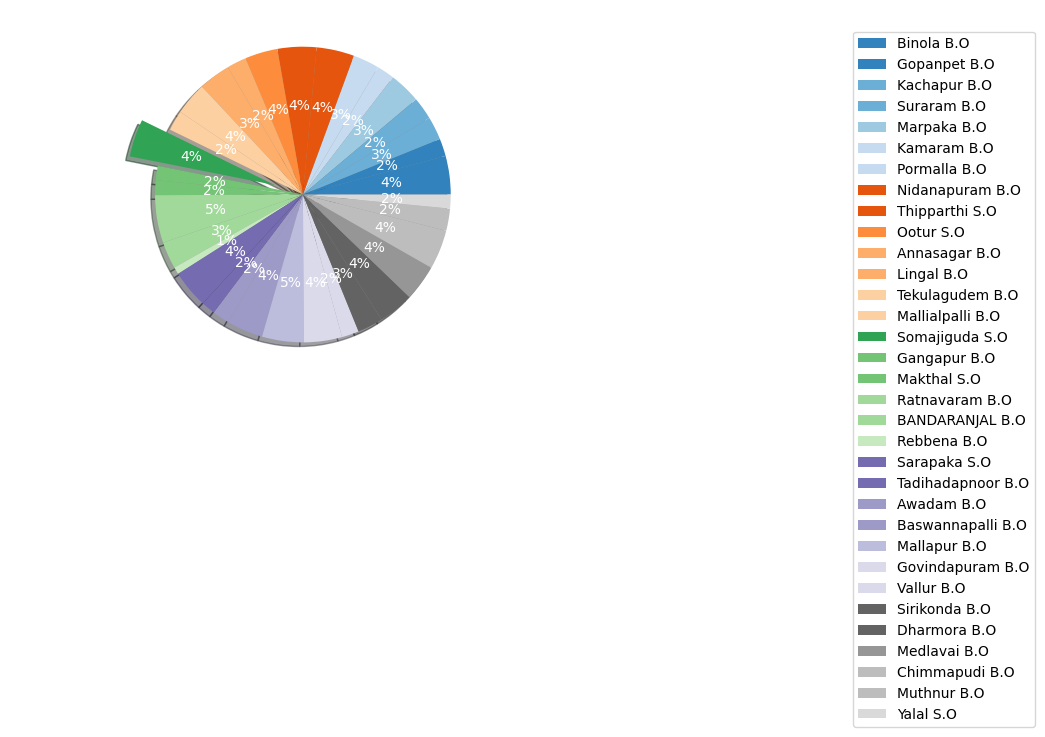

In [84]:
#plotting a pie chart
explode=[0]*33
loc=0
for s in range(33):
    if(district_name[s]=="HYDERABAD" or district_name[s]=="Hyderabad"):
        loc=s
        break
explode[loc]=0.2  #this is of hyd division

wedges,texts,autotexts=plt.pie(number,explode=explode,labels=office_name,colors=color,shadow=True,autopct='%1.0f%%',startangle=0,textprops=dict(color='w'))
plt.legend(wedges,office_name,loc='right',bbox_to_anchor=(1.5,0,1,0))

In [79]:
number_each=pd.Series(data=number,index=districts['index'])

In [80]:
#number of locations assigned to each centroid
office['Number of locations']=number_each
office

C:\Users\Fawwaz\AppData\Local\Temp\ipykernel_30340\1608851754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office['Number of locations']=number_each


,OfficeName,Number of locations
480,Binola B.O,177.0
11008,Gopanpet B.O,81.0
6757,Kachapur B.O,107.0
7211,Suraram B.O,103.0
9936,Marpaka B.O,145.0
31204,Kamaram B.O,82.0
6973,Pormalla B.O,121.0
6423,Nidanapuram B.O,173.0
138560,Thipparthi S.O,179.0
137876,Ootur S.O,150.0


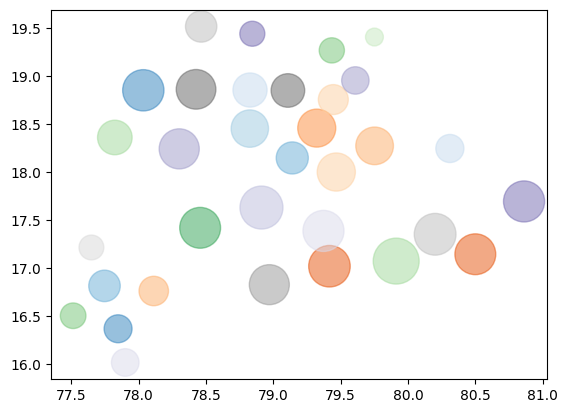

In [81]:
#bubble plot to show which centroid has how many locations
plt.scatter(centroid_long,centroid_lat,s=number*5,c=color,alpha=0.5)